In [1]:
# Developer: Collin Belik
# File: CSC221-crbelik-GroupProject
# Class: Advanced Python
# URL: https://en.wikipedia.org/wiki/List_of_countries_by_number_of_mobile_numbers_in_use

# imports
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "https://en.wikipedia.org/wiki/List_of_countries_by_number_of_mobile_numbers_in_use"

# Open url with .request into page variable
with urllib.request.urlopen(url) as response:
    page = response.read()

# Parse HTML into Beautiful soup
soup = BeautifulSoup(page, 'lxml')

# Find Table
phone_table = soup.find('table', class_='wikitable sortable')

# Column Data
A = [] # Rank
B = [] # Country
C = [] # # of numbers
D = [] # population
E = [] # phone # per 100
F = [] # Date made

# Iterate over rows of table
for rows in phone_table.find_all('tr'):
    cells = rows.find_all('td')
    if len(cells) == 6: #only rows with 6, excluding the 'World' row
        # Rank
        A.append(cells[0].find(string=True).strip())
        # Country
        country_cell = cells[1]
        country_link = country_cell.find_all('a') 
        if len(country_link) > 1:
            B.append(country_link[1].get_text(strip=True)) 
        elif len(country_link) == 1:
            B.append(country_link[0].get_text(strip=True))
        else:
            B.append(country_cell.get_text(strip=True))
        # # of numbers
        C.append(cells[2].find(string=True).strip())
        # population
        D.append(cells[3].find(string=True).strip())
        # phone # per 100
        E.append(cells[4].find(string=True).strip())
        # Date made
        F.append(cells[5].find(string=True).strip())

# Dataframe
df = pd.DataFrame({
    'Rankings': A,
    'Country': B,
    '# of Phone Numbers': C,
    'Population': D,
    'Phone # /100 Citizens': E,
    'Date of Evaluation': F
})

# Create csv file
output_file = 'CSC221-webscrape-data.csv'
df.to_csv(output_file, index=True)  # index numbers on
print(f'File: {output_file} has been created.')



File: CSC221-webscrape-data.csv has been created.


In [2]:
# Output for table
df.head(20) # change this number if you want different outputs


,Rankings,Country,# of Phone Numbers,Population,Phone # /100 Citizens,Date of Evaluation
0,1,China,"1,610,360,000","1,420,050,000",113.38,2020/10
1,2,India,"1,515,971,713","1,375,245,994",110.18,2020/10
2,3,Indonesia,"385,573,398","237,556,363",162.28,2016/07
3,4,United States,"380,577,528","327,874,628",116.27,2020/10
4,5,Brazil,"284,200,000","201,032,714",141.3,2015/05
5,6,Russia,"256,116,000","142,905,200",155.5,2013/07
6,7,Pakistan,"194,580,369","219,922,083",88.34,2022/06
7,8,Nigeria,"190,475,494","190,551,754",99.5,2020/04
8,9,Bangladesh,"180,780,000","162,951,560",111.11,2022/03
9,10,Japan,"146,649,600","127,300,000",115.2,2013


In [15]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [17]:
DF_DATA = pd.read_csv('CSC221-webscrape-data.csv')
DF_FILTERED = DF_DATA.head(20)

DF_FILTERED['Phone # /100 Citizens'] = DF_FILTERED['Phone # /100 Citizens'].str.replace(',', '.')
DF_FILTERED['Phone # /100 Citizens'] = pd.to_numeric(DF_FILTERED['Phone # /100 Citizens'])

# Sorting the DataFrame by the 'Phones' column in ascending order
df_sorted = DF_FILTERED.sort_values(by='Phone # /100 Citizens', ascending=True)




In [ ]:
df_sorted.head(20)

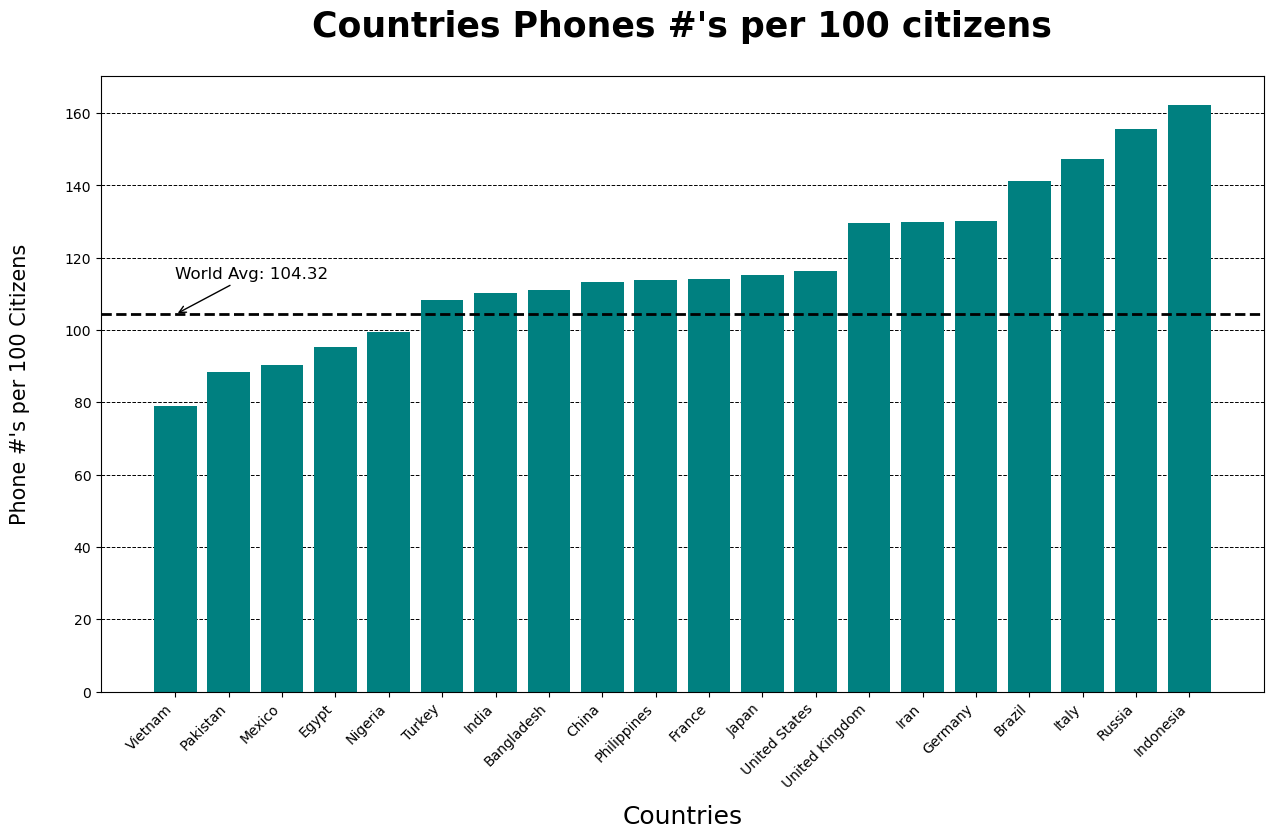

In [33]:
countries = df_sorted['Country'].values
Phones = df_sorted['Phone # /100 Citizens'].values

plt.figure(figsize=(15, 8))

plt.title("Countries Phones #'s per 100 citizens", fontsize=25, fontweight='bold', y=1.05)

plt.bar(countries, Phones, color='teal')

# Rotate the x-axis labels by 45 degrees
plt.xticks(range(len(countries)), countries, rotation=45, ha='right')

plt.xlabel('Countries', fontsize=18, labelpad = 10)
plt.ylabel("Phone #'s per 100 Citizens", fontsize=15, labelpad=25)

plt.grid(axis='y', linestyle='--', linewidth=0.7, color ='black')
plt.gca().set_axisbelow(True)

plt.gca().set_facecolor('white')

plt.axhline(y=104.32, color='black', linestyle='--', linewidth=2, label=f'World Avg: {104.32:.2f}')

plt.annotate(f'World Avg: {104.32:.2f}', xy=(0, 104.32), xytext=(0, 104.32 + 10), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.show()
